# Validation Testing

In this notebook we're going to test the validation procedures, such as Logic (Trace Driven Simulation) and Input (Quasi Trace Driven Simulation). 

#### Importing

In [99]:
from dtwinpylib.dtwinpy.Digital_Twin import Digital_Twin

import importlib
import dtwinpylib
importlib.reload(dtwinpylib.dtwinpy.Digital_Twin) #reload this specifc module to upadte the class

<module 'dtwinpylib.dtwinpy.Digital_Twin' from 'c:\\Users\\pedro\\Github Repositories\\Digital_Twin\\Digital Twin\\dtwinpylib\\dtwinpy\\Digital_Twin.py'>

### Normal Digital Twin simulation

Here we're just going to run a simple simulation using the Digital Twin itself and not just the digital model

==========  Reading the Model: model_2stations_closed  ==========
===> Big Picture
Total number of Machines: 2
Total number of Queues: 2

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 2
Arc links: [2, 1]
Capacity: 5
Parts stored: Part 1
Parts stored: Part 2
Parts stored: Part 3
Parts stored: Part 4
Queue Lenght: 4

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 2
--Queue Out:--
Queue 1
----------------
> Machine 2
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
### ============ Simulation Started ============ ###
Time: 0 - [Machine 1] got Part 1 from Queue 2 (capacity= 3)
Time: 5 - [Machine 1] put Part 1 in Queue 1 (capacity = 1)
Time: 5 - [Machine 1] got Part 2 from Queue 2 (capacity= 2)
Time: 5 - [Machine 2] got Part 1 from Queue 1 (capacity= 0)
Time: 10 - [Machine 1] put Part 2 in Queue 1 (capacity = 1)
Time: 10 - [Machine 1] got Part 3 from Queue 2 (capacity= 1)
Time: 10 - [T

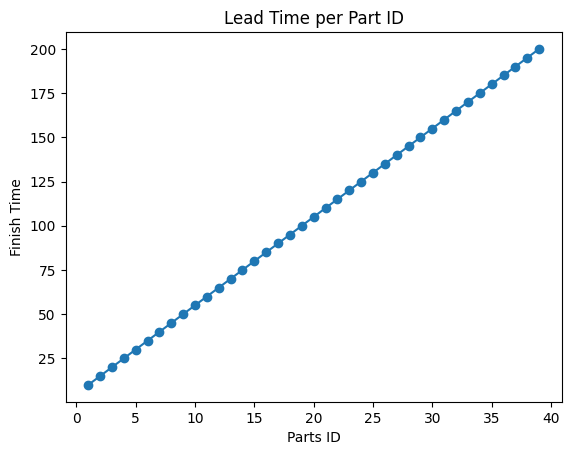

>>> *** SYSTEM THROUGHPUT: 0.195 [parts / time unit] ***
######## Running Analysis ########
Number of Parts finished: 39
Total time of Simulation: 200
List of IDs (AS IS): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
>>> Cycle Time of each part:
[10, 15, 20, 25, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
- Maximum Cycle Time: 25
- Minimum Cycle Time: 10
*** AVERAGE CYCLE TIME OF THE SYSTEM: 19.743589743589745 [time unit]***


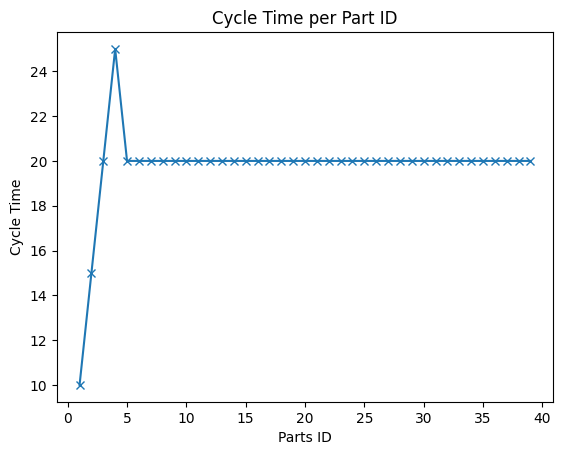

<Figure size 640x480 with 0 Axes>

In [7]:
digital_twin_1 = Digital_Twin(name= "model_2stations_closed",
    model_path= "models/model_2stations_closed.json",
    database_path="databases/2stations_closed_db.db",
    until= 201, initial=True )

digital_twin_1.run_digital_model()

## Testing Allocation of processes time for Part (ptime_TDS) and for Machine (ptime_qTDS)

First, initiate the Digital Twin and create the digital model

In [114]:
digital_twin = Digital_Twin(name= "model_2stations_closed",
    model_path= "models/model_2stations_closed.json",
    database_path="databases/2stations_closed_db.db",
    until= 4000, initial=True, maxparts=4)

digital_model = digital_twin.generate_digital_model()

==========  Reading the Model: model_2stations_closed  ==========
===> Big Picture
Total number of Machines: 2
Total number of Queues: 2

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 2
Arc links: [2, 1]
Capacity: 5
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Queue Lenght: 4

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 2
--Queue Out:--
Queue 1
---Process Time for quasi Trace Driven Simulation---
None
----------------
> Machine 2
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
---Process Time for quasi Trace Driven Simulation---
None


Create the vectors with the process time trace for each part (Trace Driven Simulation)
> The process time that the part need for each "cluster" of machines

In [115]:
matrix_ptime_TDS = [
    [10,10],
    [15,15],
    [20,20]
]

Create the vectors with the process time for each machine (quasi Trace Driven Simulation)
> The process time that the machine need for each part being processed

In [116]:
matrix_ptime_qTDS = [
    [1000,100,100,100],
    [2000,200,200,200],
]

Run the validation to do the allocation and run the simulation

In [117]:
digital_twin.run_validation(matrix_ptime_qTDS=matrix_ptime_qTDS, matrix_ptime_TDS=matrix_ptime_TDS)

IndexError: list index out of range

Use verbose to see if the allocation was done correctly

In [73]:
digital_model.verbose()

==========  Reading the Model: model_2stations_closed  ==========
===> Big Picture
Total number of Machines: 2
Total number of Queues: 2

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 2
Arc links: [2, 1]
Capacity: 5
Parts stored: Part 7
Part Processes for Trace Driven Simulation: None
Parts stored: Part 8
Part Processes for Trace Driven Simulation: None
Queue Lenght: 2

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 2
--Queue Out:--
Queue 1
---Process Time for quasi Trace Driven Simulation---
[1000, 100, 100, 100]
----------------
> Machine 2
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
---Process Time for quasi Trace Driven Simulation---
[2000, 200, 200, 200]
